In [1]:
# Initial setup

# Import of relevant packages
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import psycopg2
from sklearn import metrics
from timeit import default_timer as timer
from sklearn.naive_bayes import CategoricalNB

from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import cross_val_predict, cross_val_score, cross_validate
from sklearn.metrics import roc_curve, confusion_matrix, accuracy_score, recall_score, precision_score

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
# Set random seed 
RSEED = 42
warnings.filterwarnings("ignore")

#### This data consists prices for SELLING per each 'sq.m' for the apartments of sizes 30m2, 60m2 , 100m2

In [2]:
#Extracting the data from the website

df = pd.read_html('https://www.wohnungsboerse.net/immobilienpreise-Berlin/2825')
df1 = df[1]
df1

,JAHR,BERLIN,BE,DE
0,30 m² Mietwohnung,30 m² Mietwohnung,30 m² Mietwohnung,30 m² Mietwohnung
1,2021 pdfData.sizeDataWhgYears.push({ 'size': ...,"5.527,47 €","5.527,47 €","4.516,58 €"
2,2020 pdfData.sizeDataWhgYears.push({ 'size': ...,"5.200,56 €","5.200,56 €","4.021,14 €"
3,2019 pdfData.sizeDataWhgYears.push({ 'size': ...,"5.230,00 €","5.230,00 €","3.600,52 €"
4,2018 pdfData.sizeDataWhgYears.push({ 'size': ...,"4.361,12 €","4.361,12 €","3.052,63 €"
5,2017 pdfData.sizeDataWhgYears.push({ 'size': ...,"3.176,48 €","3.176,48 €","2.300,03 €"
6,2016 pdfData.sizeDataWhgYears.push({ 'size': ...,"3.184,19 €","3.184,19 €","2.552,38 €"
7,2015 pdfData.sizeDataWhgYears.push({ 'size': ...,"2.672,00 €","2.672,00 €","2.480,27 €"
8,2014 pdfData.sizeDataWhgYears.push({ 'size': ...,"2.583,82 €","2.583,82 €","2.233,51 €"
9,2013 pdfData.sizeDataWhgYears.push({ 'size': ...,"2.486,19 €","2.486,19 €","1.929,90 €"


### Extracting the data that we need for analysing the prices different Sq.m for Germany

In [3]:
# Extracting the columns and reversing the order using (iloc[::-1])
df2 = df1.loc[1:11, 'DE'].iloc[::-1].reset_index()
df3 = df1.loc[13:23,'DE'].iloc[::-1].reset_index()
df4 = df1.loc[25:35,'DE'].iloc[::-1].reset_index()

# joining all the new columns we want
df_W = pd.concat([df2,df3,df4],axis=1)

# Adding the years column
df_W.loc[:,'Year'] = [2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021] 
df_W.drop(columns='index',inplace=True,axis=1)

# Assigning the column names
df_W.columns = ['30m2','60m2','100m2','Year']

# Ordering the columns to have year at the beginning
df_W = df_W[['Year','30m2','60m2','100m2']]

# Converting columns to intiger and time
#df_W.Year = pd.to_datetime(df_W.Year)
#df_W['Year'] = df_W.Year.dt.year
#df_W['year'] = df_W['year'].dt.year

#df_W['30m2'] = df_W['30m2'].str.split('  ',expand = True)[0]
#df_W[['30m2','60m2','100m2']] = [x.strip('€').replace('.', '').replace(',', '.') for x in df_W[['30m2','60m2','100m2']]]
df_W['30m2'] = [x.strip('€').replace('.', '').replace(',', '.') for x in df_W['30m2']]
df_W['60m2'] = [x.strip('€').replace('.', '').replace(',', '.') for x in df_W['60m2']]
df_W['100m2'] = [x.strip('€').replace('.', '').replace(',', '.') for x in df_W['100m2']]

#df_W['30m2'] = pd.to_numeric(df_W['30m2'],errors='ignore', downcast=None )
#df_W['30m2'] = df_W['30m2'].astype(int)
#data.Population1 = pd.to_numeric(data.Population1, errors="coerce")

df_W

,Year,30m2,60m2,100m2
0,2011,1411.03,1520.60,2168.36
1,2012,1690.04,1596.73,2261.62
2,2013,1929.90,1789.22,2499.54
3,2014,2233.51,2044.30,2754.88
4,2015,2480.27,2359.35,2950.97
5,2016,2552.38,2396.09,3022.58
6,2017,2300.03,2264.10,2841.54
7,2018,3052.63,2825.95,3405.71
8,2019,3600.52,3010.40,3593.52
9,2020,4021.14,3466.08,3916.01


### Saving the the final result to CSV


In [4]:
df_W.to_csv('./data/wohnungspreise .csv')

#### This data consists prices for RENT for each 'sq.m' for the apartments of sizes 30m2, 60m2 , 100m2

In [5]:
#Extracting the data from the website

dfr = pd.read_html('https://www.wohnungsboerse.net/mietspiegel-Berlin/2825')
dfr = dfr[1]
dfr

,JAHR,BERLIN,BE,DE
0,30 m² Mietwohnung,30 m² Mietwohnung,30 m² Mietwohnung,30 m² Mietwohnung
1,2021 pdfData.sizeDataWhgYears.push({ 'size': ...,"21,48 €","21,48 €","12,80 €"
2,2020 pdfData.sizeDataWhgYears.push({ 'size': ...,"16,24 €","16,24 €","11,41 €"
3,2019 pdfData.sizeDataWhgYears.push({ 'size': ...,"14,98 €","14,98 €","11,33 €"
4,2018 pdfData.sizeDataWhgYears.push({ 'size': ...,"13,93 €","13,93 €","11,06 €"
5,2017 pdfData.sizeDataWhgYears.push({ 'size': ...,"12,04 €","12,04 €","9,68 €"
6,2016 pdfData.sizeDataWhgYears.push({ 'size': ...,"14,25 €","14,25 €","11,59 €"
7,2015 pdfData.sizeDataWhgYears.push({ 'size': ...,"11,55 €","11,55 €","9,41 €"
8,2014 pdfData.sizeDataWhgYears.push({ 'size': ...,"11,06 €","11,06 €","8,62 €"
9,2013 pdfData.sizeDataWhgYears.push({ 'size': ...,"10,08 €","10,08 €","8,38 €"


### Extracting the data that we need for analysing the rents different Sq.m for Germany

In [6]:
# Extracting the columns and reversing the order using (iloc[::-1])
df_2 = dfr.loc[1:11, 'DE'].iloc[::-1].reset_index()
df_3 = dfr.loc[13:23,'DE'].iloc[::-1].reset_index()
df_4 = dfr.loc[25:35,'DE'].iloc[::-1].reset_index()

# joining all the new columns we want
df_R = pd.concat([df_2,df_3,df_4],axis=1)

# Adding the years column
df_R.loc[:,'year'] = [2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021] 
df_R.drop(columns='index',inplace=True,axis=1)

# Assigning the column names
df_R.columns = ['30m2','60m2','100m2','year']

# Ordering the columns to have year at the beginning
df_R = df_R[['year','30m2','60m2','100m2']]

# For prediction removing the € and changing the european format to american format
df_R['30m2'] = [x.strip('€').replace('.', '').replace(',', '.') for x in df_R['30m2']]
df_R['60m2'] = [x.strip('€').replace('.', '').replace(',', '.') for x in df_R['60m2']]
df_R['100m2'] = [x.strip('€').replace('.', '').replace(',', '.') for x in df_R['100m2']]


df_R

,year,30m2,60m2,100m2
0,2011,7.63,5.56,6.11
1,2012,7.91,5.69,6.31
2,2013,8.38,5.93,6.72
3,2014,8.62,6.12,7.02
4,2015,9.41,6.56,7.61
5,2016,11.59,7.34,8.41
6,2017,9.68,7.37,7.49
7,2018,11.06,7.59,8.88
8,2019,11.33,7.83,9.13
9,2020,11.41,7.91,9.15


### Saving the final result to CSV

In [7]:
df_R.to_csv('./data/Mietspiegel.csv')

### Prediction

In [9]:
from sklearn.linear_model import LinearRegression
# Predictions for cost of apartments

# 30 m2
X = df_W['Year']
y = df_W['30m2']

X = X[:, np.newaxis]
y = y[:, np.newaxis]
lin_reg = LinearRegression()
lin_reg.fit(X,y)

xx = [2022,2023,2024,2025]
xx = np.array(xx).reshape(-1,1)

xx1 = lin_reg.predict(xx).round(2)

y1 = np.concatenate((y,xx1)).astype(float)

# 60 m2
yy = df_W['60m2']
yy = yy[:, np.newaxis]

lin_reg.fit(X,yy)
xx2 = lin_reg.predict(xx).round(2)
y2 = np.concatenate((yy,xx2)).astype(float)

# 100 m2
yyy = df_W['100m2']
yyy = yyy[:, np.newaxis]

lin_reg.fit(X,yyy)
xx3 = lin_reg.predict(xx).round(2)
y3 = np.concatenate((yyy,xx3)).astype(float)

In [18]:
from sklearn.linear_model import LinearRegression
# Predictions for renr of apartments

# 30 m2
X_1 = df_R['year']
y_30 = df_R['30m2']

X_1 = X_1[:, np.newaxis]
y_30 = y_30[:, np.newaxis]
lin_reg = LinearRegression()
lin_reg.fit(X_1,y_30)

xx_1 = [2022,2023,2024,2025]
xx_1 = np.array(xx_1).reshape(-1,1)

xx_1 = lin_reg.predict(xx_1).round(2)

y_30r = np.concatenate((y_30,xx_1)).astype(float)

# 60 m2
y_60 = df_R['60m2']
y_60 = y_60[:, np.newaxis]

lin_reg1 = LinearRegression()
lin_reg1.fit(X_1,y_60)
xx_2 = lin_reg1.predict(xx).round(2)
y_60r = np.concatenate((y_60,xx_2)).astype(float)

# 100 m2
y_100 = df_R['100m2']
y_100 = y_100[:, np.newaxis]

lin_reg2 = LinearRegression()
lin_reg2.fit(X_1,y_100)
xx_3 = lin_reg2.predict(xx).round(2)
y_100r = np.concatenate((y_100,xx_3)).astype(float)

In [17]:
df_R[['60m2','100m2']]

,60m2,100m2
0,5.56,6.11
1,5.69,6.31
2,5.93,6.72
3,6.12,7.02
4,6.56,7.61
5,7.34,8.41
6,7.37,7.49
7,7.59,8.88
8,7.83,9.13
9,7.91,9.15


In [19]:
ab_r = np.concatenate((y_30r,y_60r,y_100r),axis=1)
ab_r = pd.DataFrame(ab_r)
ab_r.loc[:,'Year'] = [2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025] 

# Assigning the column names
ab_r.columns = ['30m2','60m2','100m2','Year']

# Ordering the columns to have year at the beginning
ab_r = ab_r[['Year','30m2','60m2','100m2']]
ab_r

,Year,30m2,60m2,100m2
0,2011,7.63,5.56,6.11
1,2012,7.91,5.69,6.31
2,2013,8.38,5.93,6.72
3,2014,8.62,6.12,7.02
4,2015,9.41,6.56,7.61
5,2016,11.59,7.34,8.41
6,2017,9.68,7.37,7.49
7,2018,11.06,7.59,8.88
8,2019,11.33,7.83,9.13
9,2020,11.41,7.91,9.15


In [13]:
ab = np.concatenate((y1,y2,y3),axis=1)
ab = pd.DataFrame(ab)
ab.loc[:,'Year'] = [2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025] 

# Assigning the column names
ab.columns = ['30m2','60m2','100m2','Year']

# Ordering the columns to have year at the beginning
ab = ab[['Year','30m2','60m2','100m2']]
ab

,Year,30m2,60m2,100m2
0,2011,1411.03,1520.60,2168.36
1,2012,1690.04,1596.73,2261.62
2,2013,1929.90,1789.22,2499.54
3,2014,2233.51,2044.30,2754.88
4,2015,2480.27,2359.35,2950.97
5,2016,2552.38,2396.09,3022.58
6,2017,2300.03,2264.10,2841.54
7,2018,3052.63,2825.95,3405.71
8,2019,3600.52,3010.40,3593.52
9,2020,4021.14,3466.08,3916.01


<AxesSubplot:xlabel='Year', ylabel='60m2'>

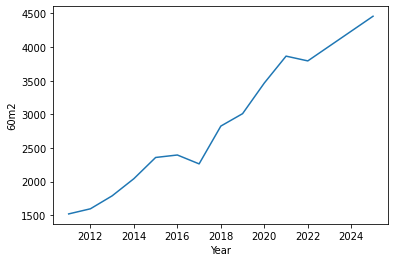

In [14]:
sns.lineplot(data=ab,x='Year',y='60m2')